In [5]:
#importing the required Packages
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn
import itertools
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import  STOPWORDS
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.util import mark_negation
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (15, 9)

import warnings
warnings.filterwarnings("ignore")

In [6]:
################## Defining the required Defined Functions

#%% Functions
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(tweet)).split())

def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        
def tweet_clean(df):
    temp_df = df.copy()
    # Remove hyperlinks
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('https?:\/\/.*\/\w*', '', regex=True)
    # Remove citations
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\@\w*', '', regex=True)
    # Remove tickers
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\$\w*', '', regex=True)
    # Remove punctuation
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('[' + string.punctuation + ']+', '', regex=True)
    # Remove quotes
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\&*[amp]*\;|gt+', '', regex=True)
    # Remove RT
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('RT', '', regex=True)
    # Remove linebreak, tab, return
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('[\n\t\r]+', ' ', regex=True)
    # Remove via with blank
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('via+\s', '', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\s+\s+', ' ', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\s+\s+', ' ', regex=True)
    # Remove HashTags 
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('\#+[\w_]+[\w\'_\-]*[\w_]+', ' ', regex=True)
    # Remove Smileys
    temp_df.loc[:, "Text"] = temp_df.loc[:, "Text"].replace('[:=]+(|o|O| )+[D\)\]]+[\(\[]+[pP]+[doO/\\]+[\(\[]+(\^_\^|)', ' ', regex=True)
    # Remove empty rows
    temp_df = temp_df.dropna()
    return temp_df

def regularExpression(textToFilter):
    filteredTweet = []
    retweetPattern = 'RT|@RT'
    urlPattern = 'https://[a-zA-Z0-9+&@#/%?=~_|!:,.;]*'

    for textLine in textToFilter:
        tweet = re.sub(retweetPattern,'',textLine)
        tweet = re.sub(urlPattern,'',tweet)
        filteredTweet.append(tweet)
    return filteredTweet

def nltkTokenizer(textToTokenize):
    filteredSentence = []
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    hashtagPattern = re.compile('#[a-zA-Z0-9]*',re.UNICODE)
    stop_words = stopwords.words('english')
    
    for textLine in textToTokenize:
        words = re.sub(usersPattern,'',textLine)
        words = re.sub(hashtagPattern,'',words)
        words = word_tokenize(words)
        for w in words:
            if w not in stop_words and w not in '@' and w not in '#':
                filteredSentence.append(w)
    return filteredSentence

def tweet_to_words(raw_tweet):
    tweet = ''.join(c for c in raw_tweet if c not in string.punctuation)
    tweet = re.sub('((www\S+)|(http\S+))', 'urlsite', tweet)
    tweet = re.sub(r'\d+', 'contnum', tweet)
    tweet = re.sub(' +',' ', tweet)
    words = tweet.lower().split()                             
    stops = set(stopwords.words("english"))
                 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))
    
def users(tweet):
    user = []
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    
    for t in tweet:
        u = re.findall(usersPattern,t)
        user.append(u)
    return user

def split_into_tokens(Text):
    return TextBlob(Text).words

def split_into_lemmas(Text):
    Text = Text.lower()
    words = TextBlob(Text).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [7]:
file_path = "C:\\Users\\91953\\Desktop\\Analytic Labs\\Thesis and Course\\Dublin Business School\\Subham\\Thesis\\Data\\All_Tweets.csv"

In [8]:
tweets = pd.read_csv(file_path)

print(tweets.shape[0])

tweet = tweets["Text"]

cleaed_Tweet = clean_tweet(tweet)

Polarity = []
for tweet in tweets['Text']:
    Polarity.append(get_tweet_sentiment(tweet))
    
tweet = tweets['Text']
data_sent = {'Text': tweet, 'Polarity': Polarity}
tweet_data = pd.DataFrame(data=data_sent)

print("========================================================================")
print("Printing the Head of the Tweets: =======================================")
print(tweet_data.head())
print("========================================================================")

12000
Printing the Head of the Tweets: =======================================
                                                Text  Polarity
0  89% of the cases reported today are asymptomat...  positive
1  89% of the cases reported today are asymptomat...  positive
2  @BarbaraGirouard @JamesE2020 @FriendsOScience ...   neutral
3  89% of today's record high Covid-19 cases in K...  positive
4  89% of the cases reported today are asymptomat...  positive


Ploting the TextBlob Sentiments: =======================================
neutral     5247
positive    4198
negative    2555
Name: Polarity, dtype: int64


Text(0.5,0,'Sentiment expressed in Posts')

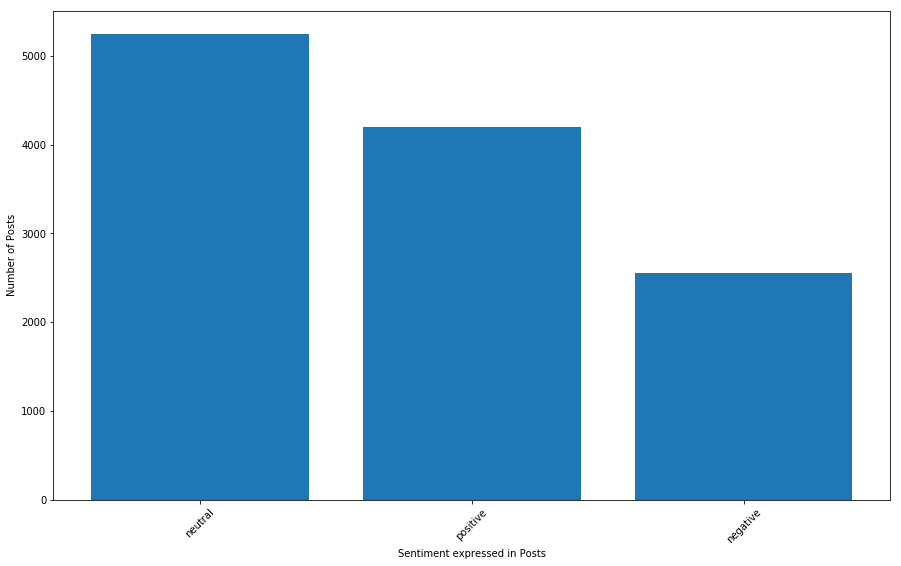

In [10]:
print("Ploting the TextBlob Sentiments: =======================================")
Index = [1,2,3]
print(tweet_data.Polarity.value_counts())
plt.bar(Index,tweet_data.Polarity.value_counts())
plt.xticks(Index,['neutral','positive', 'negative'],rotation=45)
plt.ylabel('Number of Posts')
plt.xlabel('Sentiment expressed in Posts')


In [11]:
polar = pd.DataFrame()
n = int(len(tweet)) 
sen = []
for i in range(n):
    blob = TextBlob(str(tweet[i]))
    k = blob.sentiment.polarity
    sen.append(k)
    
polar['polarity'] = sen
print("Printing the Polar Data Head: ==========================================")
print(polar.head())

Printing the Polar Data Head: ==========================================
   polarity
0  0.219444
1  0.219444
2  0.000000
3  0.086010
4  0.219444


Printing the head of Tweets Data Newly Formed: =========================
                                                Text  Polarity  length
0  89% of the cases reported today are asymptomat...  positive     162
1  89% of the cases reported today are asymptomat...  positive     162
2  @BarbaraGirouard @JamesE2020 @FriendsOScience ...   neutral     589
3  89% of today's record high Covid-19 cases in K...  positive     297
4  89% of the cases reported today are asymptomat...  positive     162


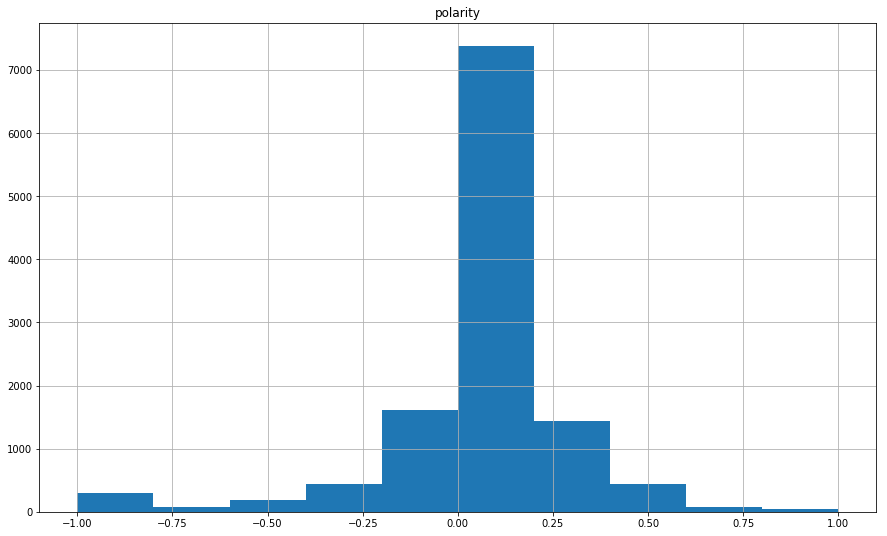

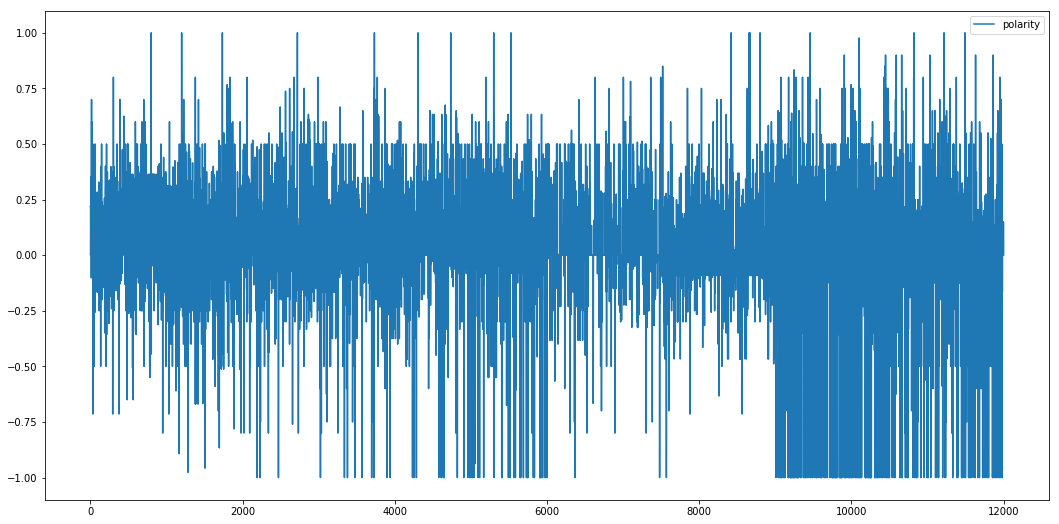

In [12]:
polar.hist()
polar.plot.line(y='polarity',figsize=(18,9))

tweet_data.groupby('Polarity').describe()

tweet_data['length'] = tweet_data['Text'].map(lambda text: len(text))
print("Printing the head of Tweets Data Newly Formed: =========================")
print(tweet_data.head())
print("========================================================================")

Histogram Plot of the Frequency: =======================================
Printing the Shape of the Tweets: ======================================
(12000, 3)


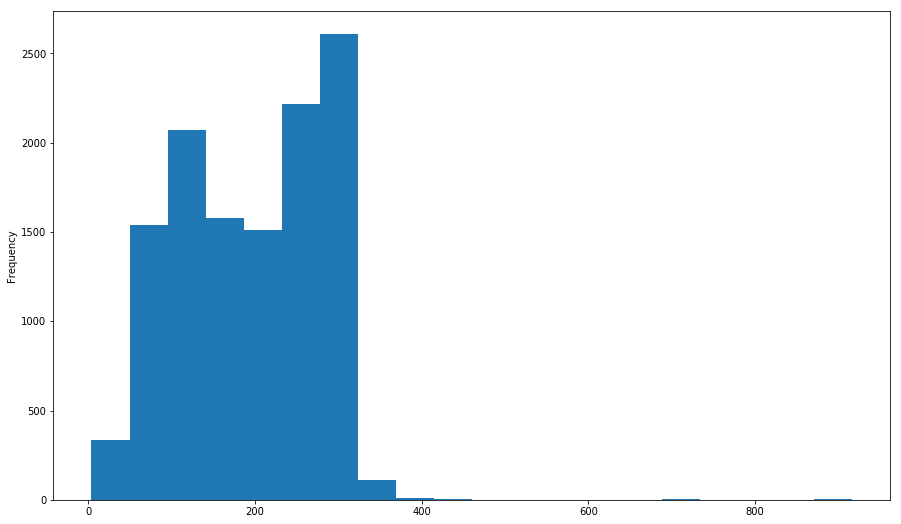

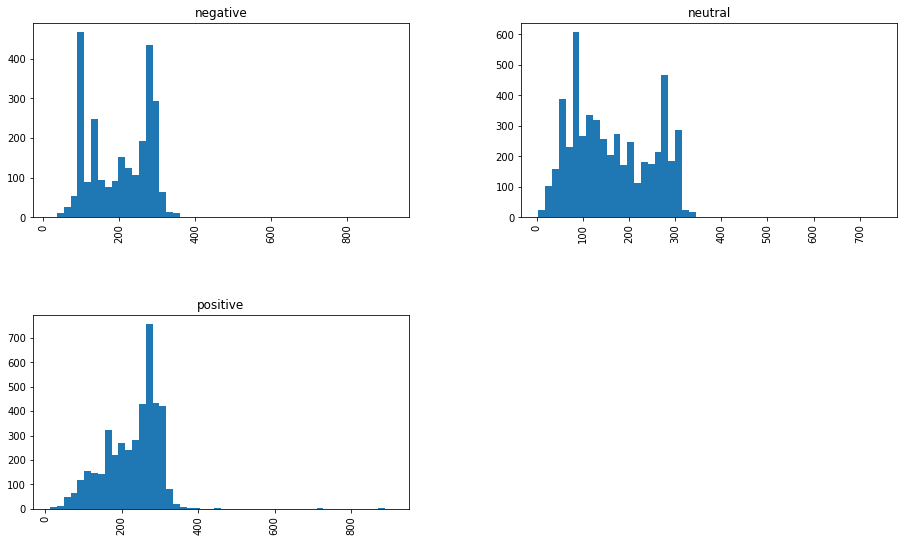

In [13]:
print("Histogram Plot of the Frequency: =======================================")
tweet_data.length.plot(bins=20, kind='hist')

tweet_data.hist(column='length', by='Polarity', bins=50)
print("Printing the Shape of the Tweets: ======================================")
print(tweet_data.shape)

In [14]:
tweets_texts = tweet_data["Text"].tolist()
stop_words=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# Get all the hashhtag words that has "#"
hashtags = ""
for line in tweets:
    words = line.split()
    for w in words:
        if w.startswith("#"):
            hashtags += w + " " 
            
# Get all the hashtags in a list
hashtags_list = re.findall(r"#(\w+)", hashtags)

print("Ploting the Hashtag WordCloud: =========================================")
try:                           
    # Set the figure-size
    plt.figure(figsize= (20,10))
    wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=3000,
                          height=2000
                         ).generate(str(hashtags_list))
    
    plt.figure(1,figsize=(20, 20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./twitter_wordcloud.png', dpi=300)
    plt.show()
except:
    print("No HashTags Found!! Please Verify the length")

print(len(hashtags_list))
print("========================================================================")

Ploting the Hashtag WordCloud: =========================================
No HashTags Found!! Please Verify the length
0


<Figure size 1440x720 with 0 Axes>

In [15]:
#%%
# Text contains 'RT' for every retweet and url refrences 
# We want to remover 'RT' and URL

filteredTweet = regularExpression(tweet_data.Text)
filteredSentence = nltkTokenizer(filteredTweet)


hashtagList = list(itertools.chain.from_iterable(hashtags_list))
hashtagCount = {}

for h in hashtagList:
    if h in hashtagCount:
        hashtagCount[h] +=1
    else:
        hashtagCount[h] = 1
        
# Extracting hastags that occurs more than 1000 times

hashtagCount = { k : v for k,v in hashtagCount.items() if v >10}
name = [k for k in hashtagCount if k ]
value = [v for v in hashtagCount.values()]

Extracting the User words used in the Tweets: ==========================


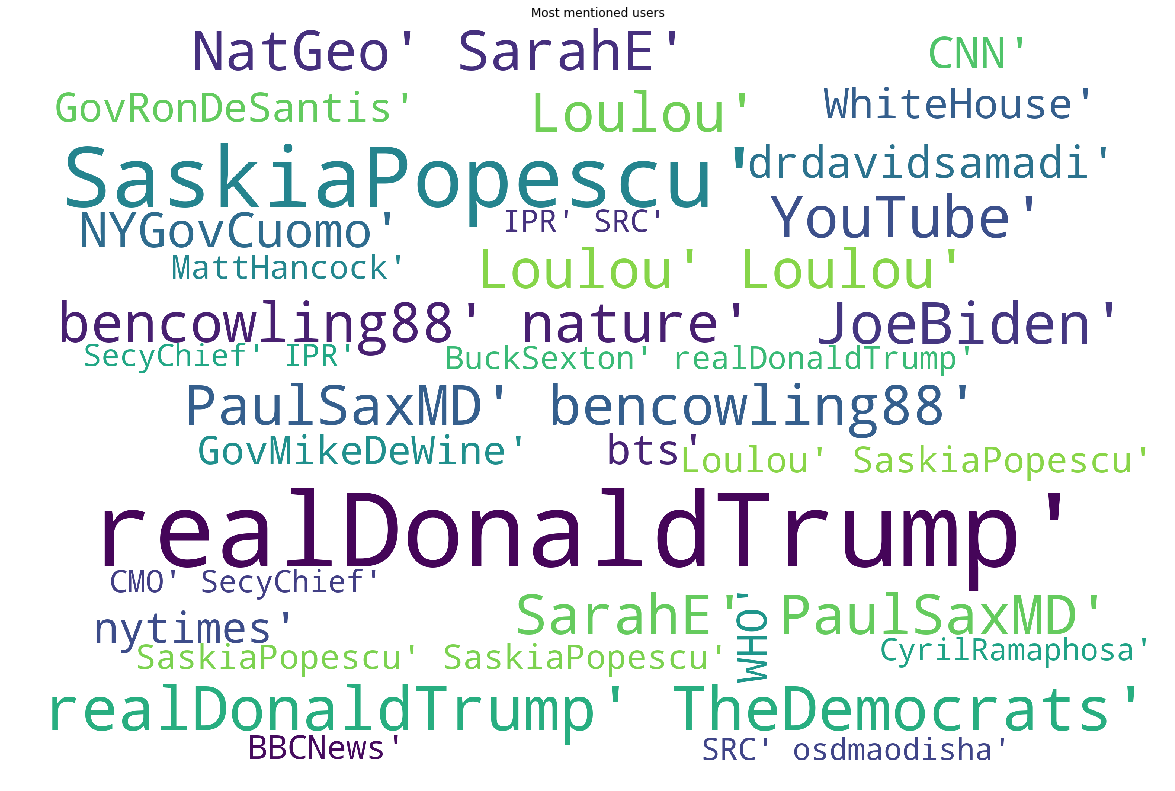

In [16]:
print("Extracting the User words used in the Tweets: ==========================")
user = users(filteredTweet)

str1 = ' '.join(str(e) for e in user)

plt.figure(figsize= (20,20))

wordcloud = WordCloud(width= 3000,height= 2000,background_color='white',max_words=30).generate(str1)
plt.imshow(wordcloud)
plt.title('Most mentioned users')
plt.axis("off")
plt.show()
print("========================================================================")

Ploting the Polarity Numbers Extracted from the TextBlob: ==============


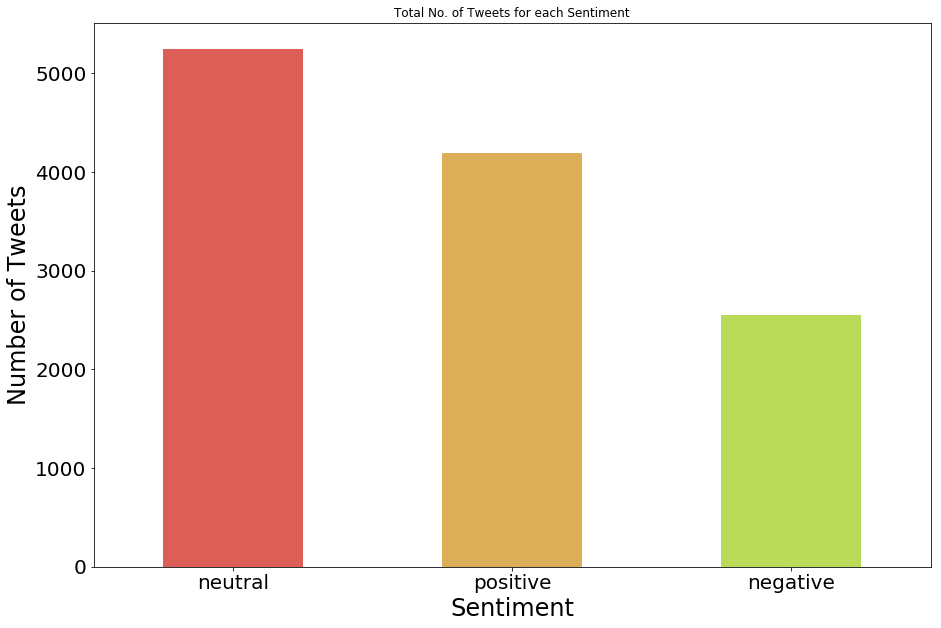

In [17]:
print("Ploting the Polarity Numbers Extracted from the TextBlob: ==============")
tweet_data.Polarity.value_counts()

colors=seaborn.color_palette("hls", 10) 
pd.Series(tweet_data["Polarity"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(15,10),fontsize=20,rot = 0, title = "Total No. of Tweets for each Sentiment")
plt.xlabel('Sentiment', fontsize=24)
plt.ylabel('Number of Tweets', fontsize=24)

colors=seaborn.color_palette("husl", 10)

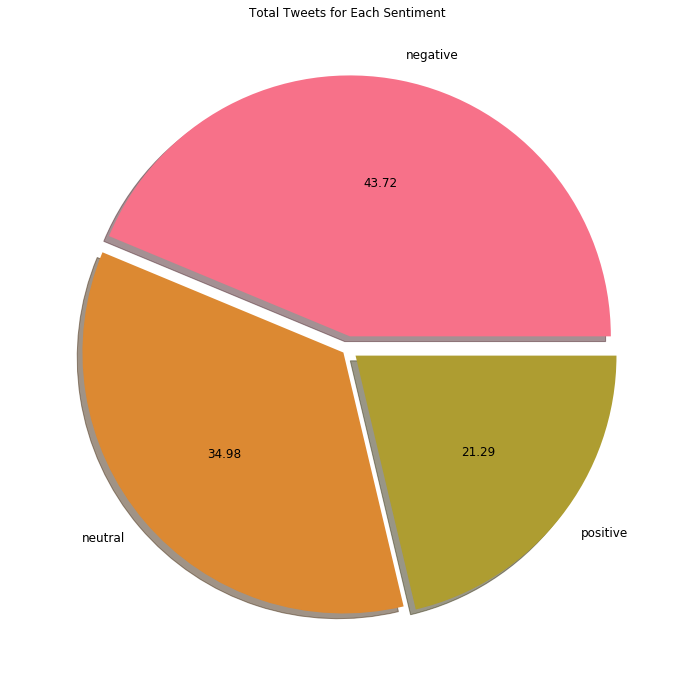

In [18]:
pd.Series(tweet_data["Polarity"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(12,12),title = "Total Tweets for Each Sentiment")

df=tweet_data[tweet_data['Polarity']=='negative']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./negative_tweet_wordcloud.png', dpi=300)
plt.show()

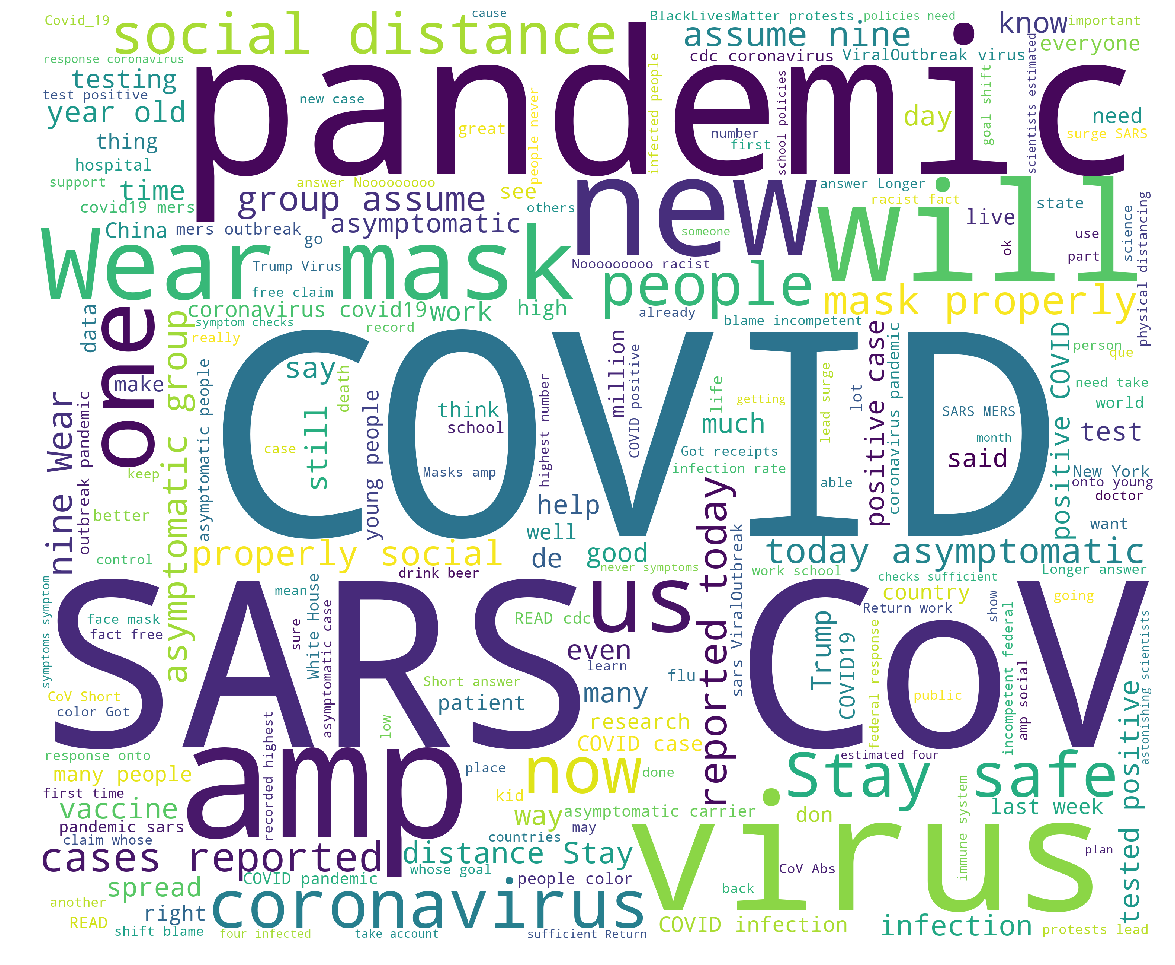

In [19]:
df=tweet_data[tweet_data['Polarity']=='positive']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./positive_tweet_wordcloud.png', dpi=300)
plt.show()

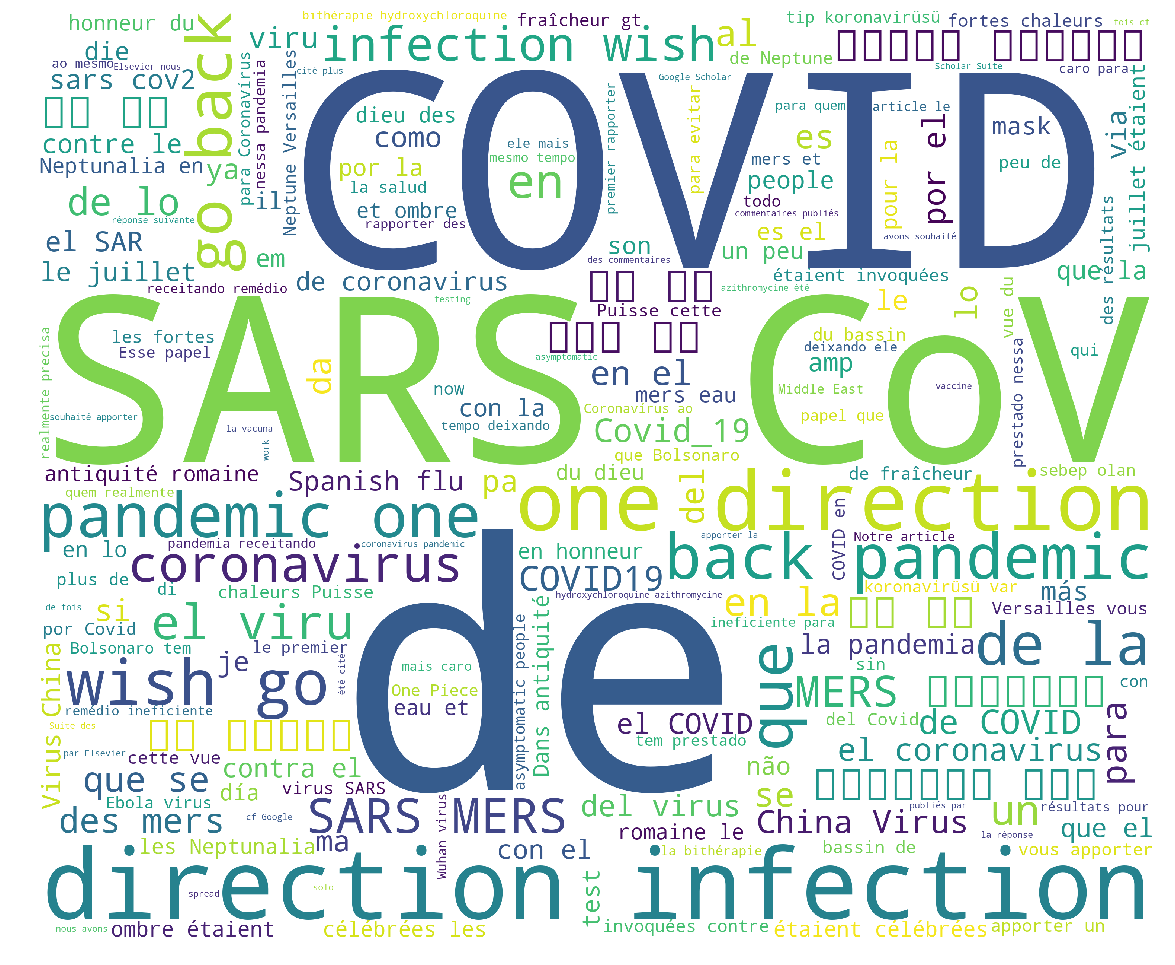

In [20]:
df=tweet_data[tweet_data['Polarity']=='neutral']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print("========================================================================")

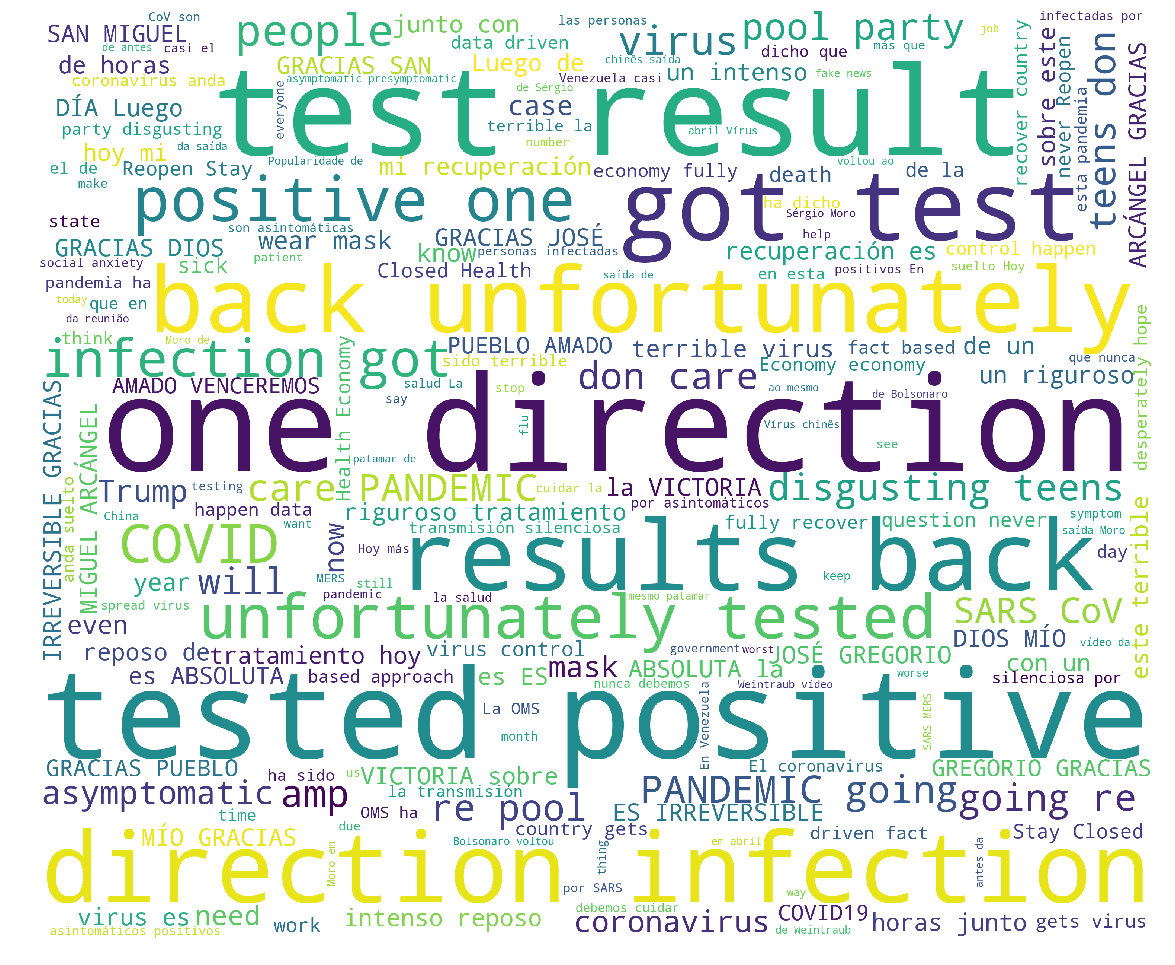

In [21]:
df=tweet_data[tweet_data['Polarity']=='negative']
words = ' '.join(df['Text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./negative_tweet_wordcloud.png', dpi=300)
plt.show()

In [22]:
print("========================================================================")
print("Starting the Machine Learning Analysis: ================================")
print("========================================================================")

tweet_data['clean_tweet']=tweet_data['Text'].apply(lambda x: tweet_to_words(x))
train,test = train_test_split(tweet_data,test_size=0.33,random_state=0)

train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
print("Using the COUNTVECTORIZER: =============================================")    
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


Classifiers = [
    LogisticRegression(C=0.001,multi_class='multinomial',max_iter=10,solver='sag', tol=1e-1),
    
    RandomForestClassifier(n_estimators=200, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs= -1,
            oob_score=False, random_state=10),
    
    AdaBoostClassifier(n_estimators=100, random_state=10),
    
    BernoulliNB(),
    
    MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
    
    KNeighborsClassifier(algorithm='auto', metric='minkowski',
           metric_params=None, n_neighbors=2, p=2,
           weights='uniform'),
    
    tree.DecisionTreeClassifier(),
    
    ensemble.ExtraTreesClassifier(n_estimators=100,
                                  max_features= 50,
                                  criterion= 'entropy'),
    
    ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001,n_estimators=50,presort='auto', random_state=None, verbose = 0)]
    
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
print("Entering into the Classifiers: =========================================")
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Polarity'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['Polarity'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity'])
    print("====================================================================")
    print("********************************************************************")
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print("********************************************************************")
    print("====================================================================")
    Accuracy.append(accuracy)
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test['Polarity'], pred)))
    cm = metrics.confusion_matrix(test['Polarity'], pred)
    print("--------------------------------------------------------------------")
    print("Confusion matrix:\n%s" % cm)
    print("--------------------------------------------------------------------")
    Model.append(classifier.__class__.__name__)
    print("********************************************************************")
    print("====================================================================")
    

Starting the Machine Learning Analysis: ================================
Using the COUNTVECTORIZER: =============================================
Entering into the Classifiers: =========================================
********************************************************************
Accuracy of LogisticRegressionis 0.7080808080808081
********************************************************************
Classification report for classifier LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag', tol=0.1,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

   negative       0.90      0.29      0.44       857
    neutral       0.86      0.76      0.81      1757
   positive       0.57      0.90      0.70      1346

avg / total       0.77      0.71      0.69      3960


-------------------

********************************************************************
Accuracy of ExtraTreesClassifieris 0.8550505050505051
********************************************************************
Classification report for classifier ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features=50, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False):
             precision    recall  f1-score   support

   negative       0.96      0.61      0.74       857
    neutral       0.87      0.96      0.91      1757
   positive       0.80      0.88      0.84      1346

avg / total       0.86      0.86      0.85      3960


--------------------------------------------------------------------
Confusion matrix:
[[ 521  112

Ploting the Model Performances: ========================================
Using the CountVectorizer on the Original Data: ========================
************************************************************************
Accuracy is 0.8058333333333333
------------------------------------------------------------------------
Classification report for classifier GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False):
             precision    recall  f1-score   support

   negative       0.78      0.66      0.72       749
    neutral       0.96      0.78      0.86      1575
   posi

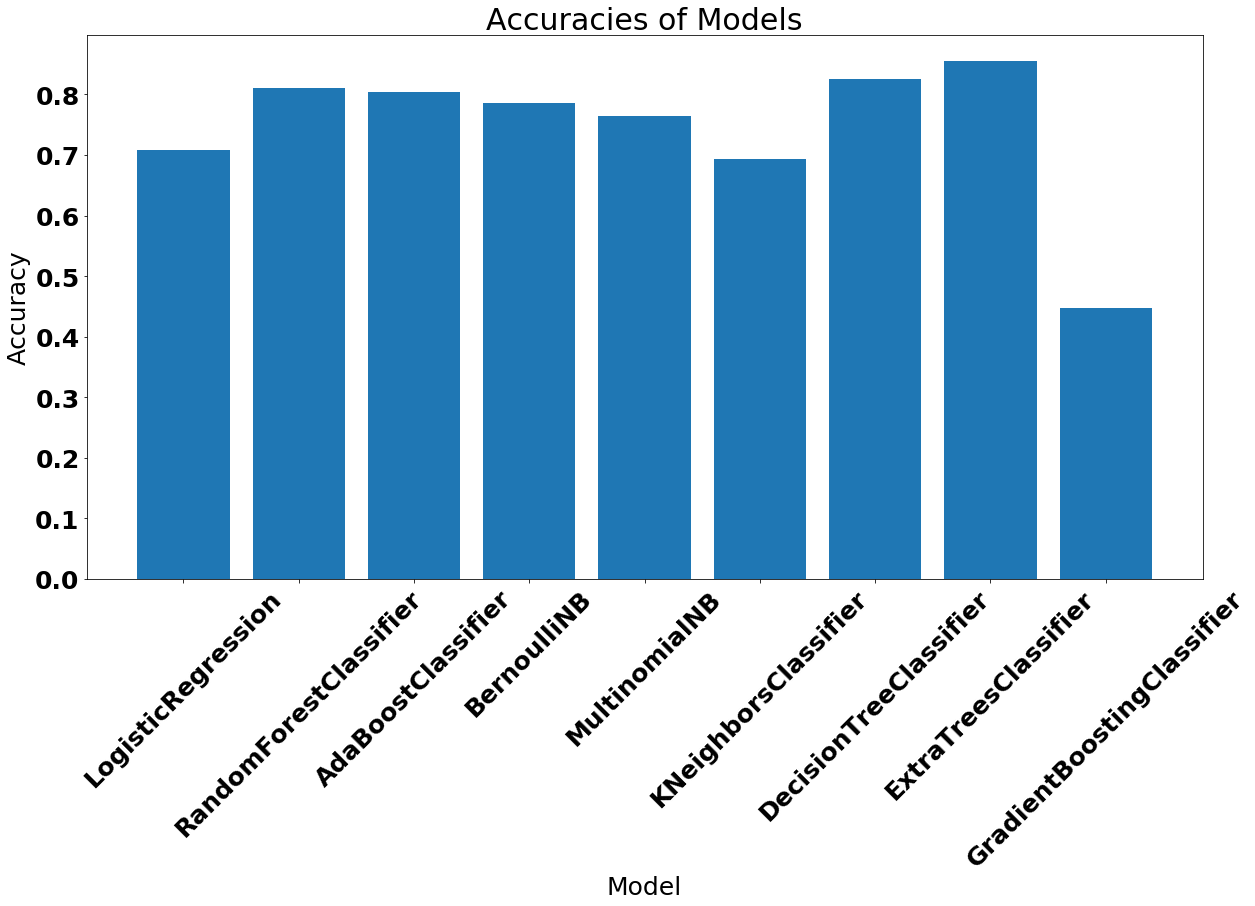

In [23]:
print("Ploting the Model Performances: ========================================")
Index = [1,2,3,4,5,6,7,8,9]
plt.figure(1,figsize=(20, 10))
font = {'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)

plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

print("Using the CountVectorizer on the Original Data: ========================")
tweets = tweet_data['Text']
cv = CountVectorizer(ngram_range=(1,2), min_df=3, max_df=.95, stop_words='english')
bow = cv.fit_transform(tweets)

# use below if you need a data frame
bow_df = pd.DataFrame(bow.toarray(), index=tweets.index, columns=cv.get_feature_names())

X, Y = bow, (tweet_data['Polarity']).ravel()

binarize = Binarizer()
X = binarize.fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, Y,test_size=0.3)

model = MultinomialNB()
model.fit(X_train, y_train)

preds = model.predict(X_test)

accuracy = accuracy_score(preds, y_test)
print("========================================================================")
print("************************************************************************")
print('Accuracy is ' + str(accuracy))
print("------------------------------------------------------------------------")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, preds)))
cm = metrics.confusion_matrix(y_test, preds)
print("------------------------------------------------------------------------")
print("Confusion matrix:\n%s" % cm)
print("========================================================================")


In [24]:
X, Y = bow, (tweet_data['Polarity']).ravel()
ss = StandardScaler()
X = X.toarray()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, Y,test_size=0.3)

model = SVC()
model.fit(X_train, y_train)

preds = model.predict(X_test)

accuracy = accuracy_score(preds, y_test)
print("************************************************************************")
print('Accuracy is '+str(accuracy))
print("------------------------------------------------------------------------")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, preds)))
cm = metrics.confusion_matrix(y_test, preds)
print("------------------------------------------------------------------------")
print("Confusion matrix:\n%s" % cm)
print("========================================================================")

models = [('mNB' , MultinomialNB()),
          ('bNB' , BernoulliNB()),
          ('svc' , SVC())]

print('{0}\t{1:<1}\t{2:<4}\t{3:<4}'.format("ACCURACY", "MEAN", "MIN", "MAX"))


************************************************************************
Accuracy is 0.8063888888888889
------------------------------------------------------------------------
Classification report for classifier GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False):
             precision    recall  f1-score   support

   negative       1.00      0.56      0.71       772
    neutral       0.79      0.93      0.85      1580
   positive       0.77      0.81      0.79      1248

avg / total       0.83      0.81      0.80      3600


--------------------------------------------

In [25]:
for name, model in models:    
    X, Y = bow, (tweet_data['Polarity']).ravel()
    
    if name == 'bNB':
        binarize = Binarizer()
        X = binarize.fit_transform(X)
    elif name == 'svc':
        ss = StandardScaler()
        X = X.toarray()
        X = ss.fit_transform(X)
        
    cv = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    print('{0}\t{1:<3}\t{2:<4}\t{3:<4}'.format(name, round(cv.mean(), 4), round(cv.min(), 4), round(cv.max(), 4)))

mNB	0.648	0.5427	0.7421
bNB	0.6791	0.5932	0.7621
svc	0.662	0.5685	0.7591


In [26]:
tweet_data.Text.head()

tweet_data.Text.apply(split_into_tokens)

bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(tweet_data['Text'])
print("Printing the COuntVectorizer BOW: ======================================")
print(len(bow_transformer.vocabulary_))
print("========================================================================")

tweet1 = tweet_data['Text'][0]
print(tweet1)

bow1 = bow_transformer.transform([tweet1])
print(bow1)
print(bow1.shape)

print("========================================================================")

Printing the COuntVectorizer BOW: ======================================
40237
89% of the cases reported today are asymptomatic.
If you are in a group of 10, assume nine of you have it!
Wear your mask properly and social distance.
Stay safe!
  (0, 253)	1
  (0, 1350)	1
  (0, 1436)	1
  (0, 2612)	1
  (0, 3070)	2
  (0, 3328)	1
  (0, 3354)	1
  (0, 5576)	1
  (0, 9496)	1
  (0, 13429)	1
  (0, 13827)	1
  (0, 14668)	1
  (0, 14938)	1
  (0, 15813)	1
  (0, 18644)	1
  (0, 20736)	1
  (0, 21318)	3
  (0, 23971)	1
  (0, 25399)	1
  (0, 26283)	1
  (0, 27755)	1
  (0, 28247)	1
  (0, 34047)	1
  (0, 34390)	1
  (0, 36612)	1
  (0, 37224)	2
  (0, 37233)	1
(1, 40237)


In [27]:
tweets_bow = bow_transformer.transform(tweet_data['Text'])
print('sparse matrix shape:', tweets_bow.shape)
print('number of non-zeros:', tweets_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweets_bow.shape[1])))
print("========================================================================")

tfidf_transformer = TfidfTransformer().fit(tweets_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print("Printing the TF-IDF Vectors: ===========================================")
print(tfidf1)
print("========================================================================")
print("TF-IDF Shape ===========================================================")
print(tfidf1.shape)
print("========================================================================")
tweets_tfidf = tfidf_transformer.transform(tweets_bow)

sparse matrix shape: (12000, 40237)
number of non-zeros: 321873
sparsity: 0.07%
Printing the TF-IDF Vectors: ===========================================
  (0, 37233)	0.17023825244130142
  (0, 37224)	0.269388204804755
  (0, 36612)	0.19868285680668113
  (0, 34390)	0.193090325525985
  (0, 34047)	0.07384332794172017
  (0, 28247)	0.20350308280208593
  (0, 27755)	0.20734193860214528
  (0, 26283)	0.21374339216488197
  (0, 25399)	0.21042163368618824
  (0, 23971)	0.23233463848108252
  (0, 21318)	0.2821371783638204
  (0, 20736)	0.23630146679872074
  (0, 18644)	0.1607742858578646
  (0, 15813)	0.11887685296562249
  (0, 14938)	0.10133959242272426
  (0, 14668)	0.15218409503709066
  (0, 13827)	0.12138630362976884
  (0, 13429)	0.2253684863238835
  (0, 9496)	0.2272844955816938
  (0, 5576)	0.15705174877315234
  (0, 3354)	0.13231740875470657
  (0, 3328)	0.23735418075323655
  (0, 3070)	0.24490418752774623
  (0, 2612)	0.09158969922734571
  (0, 1436)	0.0821434755239757
  (0, 1350)	0.21354060124203336
  (0, 

************************************************************************
Running Multinomial NB on TF-IDF
************************************************************************
predicted: ['positive']
expected: positive
['positive' 'positive' 'positive' ... 'positive' 'positive' 'neutral']
accuracy 0.7835833333333333
confusion matrix
 [[1233   70 1252]
 [  10 4122 1115]
 [  11  139 4048]]
(row=expected, col=predicted)
             precision    recall  f1-score   support

   negative       0.98      0.48      0.65      2555
    neutral       0.95      0.79      0.86      5247
   positive       0.63      0.96      0.76      4198

avg / total       0.85      0.78      0.78     12000



<Figure size 720x720 with 0 Axes>

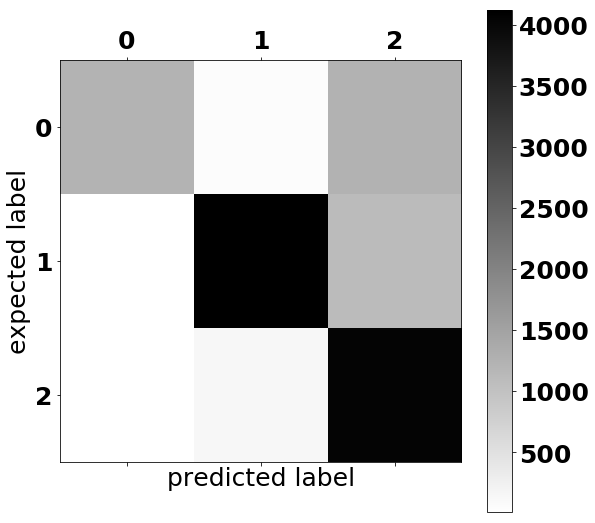

In [28]:
print("************************************************************************")
print("Running Multinomial NB on TF-IDF")
print("************************************************************************")
polarity_detector = MultinomialNB().fit(tweets_tfidf, tweet_data['Polarity'])

print('predicted:', polarity_detector.predict(tfidf1[0]))
print('expected:', tweet_data.Polarity[0])

all_predictions = polarity_detector.predict(tweets_tfidf)
print(all_predictions)

print('accuracy', accuracy_score(tweet_data['Polarity'], all_predictions))
print('confusion matrix\n', confusion_matrix(tweet_data['Polarity'], all_predictions))
print('(row=expected, col=predicted)')

plt.figure(figsize=(10,10))
plt.matshow(confusion_matrix(tweet_data['Polarity'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

print(classification_report(tweet_data['Polarity'], all_predictions))
print("========================================================================")

************************************************************************
Running Support Vector Machines on TF-IDF
************************************************************************
predicted: ['neutral']
expected: positive
['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']
accuracy 0.43725
confusion matrix
 [[   0 2555    0]
 [   0 5247    0]
 [   0 4198    0]]
(row=expected, col=predicted)


Text(0.5,0,'predicted label')

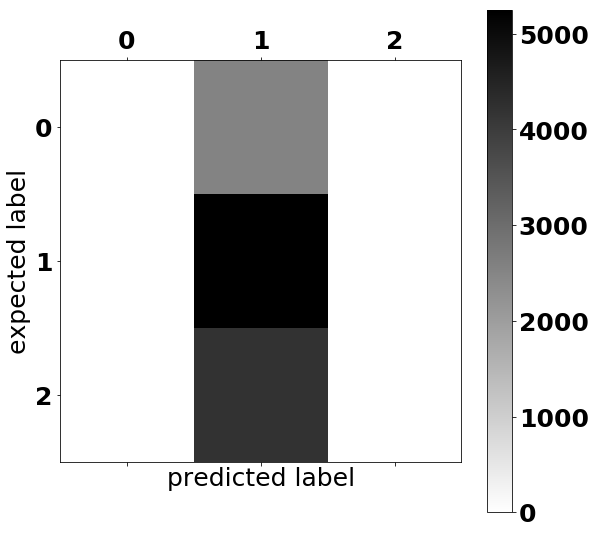

In [29]:
print("************************************************************************")
print("Running Support Vector Machines on TF-IDF")
print("************************************************************************")
polarity_detector = SVC().fit(tweets_tfidf, tweet_data['Polarity'])
print('predicted:', polarity_detector.predict(tfidf1[0]))
print('expected:', tweet_data.Polarity[0])

all_predictions = polarity_detector.predict(tweets_tfidf)
print(all_predictions)

print('accuracy', accuracy_score(tweet_data['Polarity'], all_predictions))
print('confusion matrix\n', confusion_matrix(tweet_data['Polarity'], all_predictions))
print('(row=expected, col=predicted)')

plt.matshow(confusion_matrix(tweet_data['Polarity'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [30]:
print("========================================================================")
print("Comparison Run: ========================================================")

X_train, X_test, y_train, y_test = \
    train_test_split(tweet_data['Text'], tweet_data['Polarity'], test_size=0.2)

vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf=True,stop_words='english')
train_corpus_tf_idf = vectorizer.fit_transform(X_train) 
test_corpus_tf_idf = vectorizer.transform(X_test)

svm_model = LinearSVC()
nb_model = MultinomialNB()

svm_model.fit(train_corpus_tf_idf,y_train)
nb_model.fit(train_corpus_tf_idf,y_train)

svm_result = svm_model.predict(test_corpus_tf_idf)
nb_result = nb_model.predict(test_corpus_tf_idf)

Comparison Run: ========================================================


accuracy 0.87
confusion matrix
 [[366  43  73]
 [ 20 986  55]
 [ 46  75 736]]
(row=expected, col=predicted)


Text(0.5,0,'predicted label')

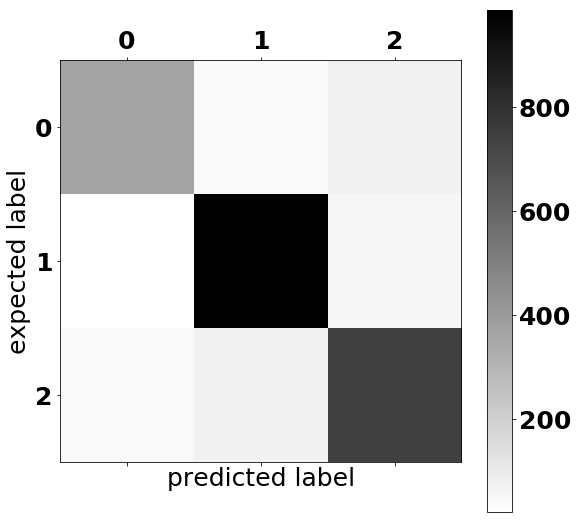

In [31]:
print('accuracy', accuracy_score(y_test, svm_result))
print('confusion matrix\n', confusion_matrix(y_test, svm_result))
print('(row=expected, col=predicted)')
plt.matshow(confusion_matrix(y_test, svm_result), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

accuracy 0.7804166666666666
confusion matrix
 [[246  14 222]
 [ 11 821 229]
 [ 18  33 806]]
(row=expected, col=predicted)


Text(0.5,0,'predicted label')

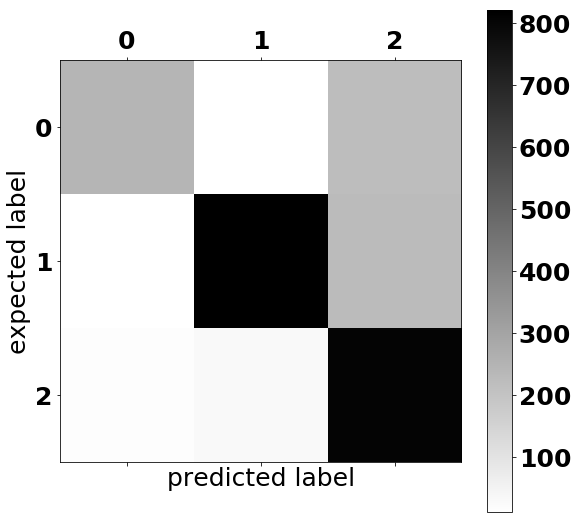

In [32]:
print('accuracy', accuracy_score(y_test, nb_result))
print('confusion matrix\n', confusion_matrix(y_test, nb_result))
print('(row=expected, col=predicted)')
plt.matshow(confusion_matrix(y_test, nb_result), cmap=plt.cm.binary, interpolation='nearest')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [33]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   tokenizer=word_tokenize,         # ! Comment line to include mark_negation and uncomment next line
                                   #tokenizer=lambda text: mark_negation(word_tokenize(text)), 
                                   preprocessor=lambda text: text.replace("<br />", " "),
                                   max_features=10000) ),
    ('classifier', LinearSVC())
])
 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

 
clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   #tokenizer=word_tokenize,         # ! Comment line to include mark_negation and uncomment next line
                                   tokenizer=lambda text: mark_negation(word_tokenize(text)), 
                                   preprocessor=lambda text: text.replace("<br />", " "),
                                   max_features=10000) ),
    ('classifier', LinearSVC())
])
 
clf.fit(X_train, y_train)
t = clf.score(X_test, y_test)
print("Analysis for the Linear SVC using CountVectorizer: ", t)

Analysis for the Linear SVC using CountVectorizer:  0.8508333333333333


In [34]:
print("========================================================================")
print("Running the N-Grams on the Tweets: ")
print("========================================================================")
bigram_clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   ngram_range=(2, 2),
                                   tokenizer=word_tokenize, 
                                   # tokenizer=lambda text: mark_negation(word_tokenize(text)),
                                   preprocessor=lambda text: text.replace("<br />", " "),)),
    ('classifier', LinearSVC())
])
 
bigram_clf.fit(X_train, y_train)
t = bigram_clf.score(X_test, y_test)
print("Bi Gram Analysis Results with Ngram 2,2: ", t)
print("------------------------------------------------------------------------")
unigram_bigram_clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   ngram_range=(1, 2),
                                   tokenizer=word_tokenize,
                                   # tokenizer=lambda text: mark_negation(word_tokenize(text)),
                                   preprocessor=lambda text: text.replace("<br />", " "),)),
    ('classifier', LinearSVC())
])
 
unigram_bigram_clf.fit(X_train, y_train)
t = unigram_bigram_clf.score(X_test, y_test)
print("UNigram Bigram Analysis with ngram 1,2: ", t)
print("------------------------------------------------------------------------")
unigram_bigram_clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                   ngram_range=(1, 2),
                                   #tokenizer=word_tokenize,
                                   tokenizer=lambda text: mark_negation(word_tokenize(text)),
                                   preprocessor=lambda text: text.replace("<br />", " "),)),
    ('classifier', LinearSVC())
])
 
unigram_bigram_clf.fit(X_train, y_train)
t = unigram_bigram_clf.score(X_test, y_test)
print("UNigram Bigram Analysis with ngram 1,2 and Tokennization: ", t)
print("------------------------------------------------------------------------")
print("END of the Analysis")
print("------------------------------------------------------------------------")
print("========================================================================")


Running the N-Grams on the Tweets: 
Bi Gram Analysis Results with Ngram 2,2:  0.80875
------------------------------------------------------------------------
UNigram Bigram Analysis with ngram 1,2:  0.85
------------------------------------------------------------------------
UNigram Bigram Analysis with ngram 1,2 and Tokennization:  0.84875
------------------------------------------------------------------------
END of the Analysis
------------------------------------------------------------------------
